In [23]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from load_data import load_data

In [39]:
fx_fixes, swaps_fixes, cpi_data, real_swaps_rates = load_data(data_dir='../data')

In [40]:
def process(df): 
    df = df.copy()[df.index.hour == 16]
    df.index = pd.to_datetime(df.index, utc=False)
    df.index = df.index.map(lambda x: x.replace(hour=0, minute=0, second=0, microsecond=0))
    df.index = df.index.map(lambda x: x.tz_localize(None))
    return df

fx_fixes = process(fx_fixes)
fx_fixes.head()

,AUDUSD,DKKUSD,EURUSD,GBPUSD,NZDUSD,CADUSD,CHFUSD,JPYUSD,NOKUSD,SEKUSD
Date,,,,,,,,,,
2000-01-03,0.6603,0.137948,1.0200,1.6334,0.5255,0.691419,0.635970,0.009838,0.125870,0.118845
2000-01-04,0.6565,0.138518,1.0306,1.6388,0.5201,0.689037,0.642178,0.009699,0.125964,0.119470
2000-01-05,0.6562,0.138685,1.0344,1.6446,0.5186,0.688942,0.644870,0.009634,0.125938,0.119838
2000-01-06,0.6548,0.138692,1.0286,1.6456,0.5152,0.685401,0.640943,0.009505,0.125559,0.119153
2000-01-07,0.6551,0.138347,1.0299,1.6378,0.5171,0.684838,0.640369,0.009505,0.125426,0.118817


In [61]:
swaps_fixes = process(swaps_fixes)
swaps_fixes.tail()


,AUDUSD,DKKUSD,EURUSD,GBPUSD,NZDUSD,CADUSD,CHFUSD,JPYUSD,NOKUSD,SEKUSD,USD
Date,,,,,,,,,,,
2023-11-09,4.6690,3.6667,3.5230,NaN,5.3050,4.9355,NaN,NaN,4.631,3.8269,NaN
2023-11-10,4.6950,3.7050,3.5720,NaN,5.3150,4.9721,NaN,NaN,4.702,3.8730,NaN
2023-11-13,4.7344,3.7260,3.5825,NaN,5.3700,4.9851,NaN,NaN,4.707,3.8940,NaN
2023-11-14,4.6369,3.6530,3.5055,NaN,5.3350,4.8088,NaN,NaN,4.636,3.7655,NaN
2023-11-15,4.6102,3.6404,3.5030,NaN,5.1913,5.1435,NaN,NaN,4.602,3.7375,NaN


In [19]:
fx_returns = fx_fixes.pct_change()
fx_returns.head()

,AUDUSD,DKKUSD,EURUSD,GBPUSD,NZDUSD,CADUSD,CHFUSD,JPYUSD,NOKUSD,SEKUSD
Date,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.005755,0.004128,0.010392,0.003306,-0.010276,-0.003445,0.009761,-0.014064,0.000743,0.005257
2000-01-05,-0.000457,0.001207,0.003687,0.003539,-0.002884,-0.000138,0.004192,-0.006744,-0.000202,0.003080
2000-01-06,-0.002133,0.000055,-0.005607,0.000608,-0.006556,-0.005141,-0.006089,-0.013402,-0.003013,-0.005719
2000-01-07,0.000458,-0.002490,0.001264,-0.004740,0.003688,-0.000822,-0.000897,0.000000,-0.001054,-0.002816


In [45]:
cpi_data = cpi_data.rolling(12).mean().reindex(fx_returns.index, method='ffill')
cpi_data.head()

,AUD,DKK,EUR,GBP,NZD,CAD,CHF,JPY,NOK,SEK,USD
Date,,,,,,,,,,,
2000-01-03,0.453478,2.477442,2.958333,1.741667,-0.113281,1.733767,0.806577,-0.345808,2.158333,0.575,NaN
2000-01-04,0.453478,2.477442,2.958333,1.741667,-0.113281,1.733767,0.806577,-0.345808,2.158333,0.575,NaN
2000-01-05,0.453478,2.477442,2.958333,1.741667,-0.113281,1.733767,0.806577,-0.345808,2.158333,0.575,NaN
2000-01-06,0.453478,2.477442,2.958333,1.741667,-0.113281,1.733767,0.806577,-0.345808,2.158333,0.575,NaN
2000-01-07,0.453478,2.477442,2.958333,1.741667,-0.113281,1.733767,0.806577,-0.345808,2.158333,0.575,NaN


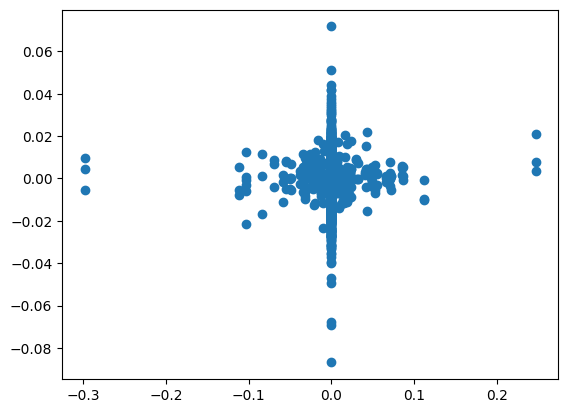

In [56]:
plt.scatter(
    cpi_data["AUD"].diff(), fx_returns["AUDUSD"].shift(-1)
)

Date
2021-02-26   -0.390244
2020-06-12   -0.389286
2000-09-18   -0.389262
2020-03-05   -0.383784
2000-12-22   -0.380952
dtype: float64


C:\Users\andre\AppData\Local\Temp\ipykernel_22008\184662348.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  diff_chg = differential.pct_change()


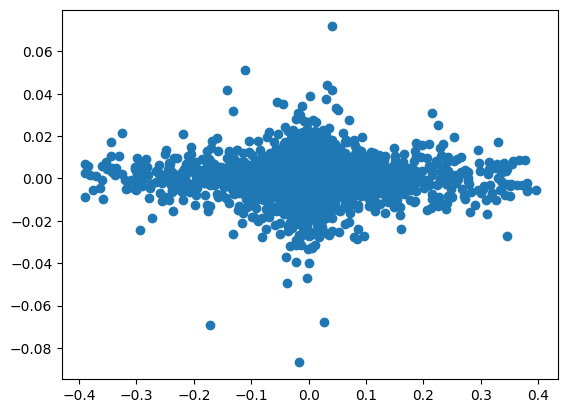

In [70]:
differential = swaps_fixes['AUDUSD']  - swaps_fixes['USD']
diff_chg = differential.pct_change()
diff_chg = diff_chg[diff_chg.abs() < 0.4]
print(diff_chg.sort_values().head())
plt.scatter(diff_chg, fx_returns['AUDUSD'].reindex(diff_chg.index).shift(-1))

In [77]:
from statsmodels.tsa.stattools import adfuller

adfuller(fx_returns['AUDUSD'].dropna())

(-20.3617184579048,
 0.0,
 13,
 6213,
 {'1%': -3.4314029540982074,
  '5%': -2.862005311847996,
  '10%': -2.5670176826197535},
 -42831.14570573663)

In [71]:
swaps_fixes.corr()

,AUDUSD,DKKUSD,EURUSD,GBPUSD,NZDUSD,CADUSD,CHFUSD,JPYUSD,NOKUSD,SEKUSD,USD
AUDUSD,1.000000,0.884783,0.901242,0.871245,0.940496,0.730820,0.874674,0.744469,0.806828,0.877699,0.658310
DKKUSD,0.884783,1.000000,0.994834,0.934991,0.899038,0.847572,0.981476,0.711003,0.936947,0.960728,0.777462
EURUSD,0.901242,0.994834,1.000000,0.951929,0.918622,0.868020,0.980945,0.706932,0.932603,0.969392,0.792979
GBPUSD,0.871245,0.934991,0.951929,1.000000,0.939581,0.922689,0.934734,0.598732,0.856545,0.910582,0.869385
NZDUSD,0.940496,0.899038,0.918622,0.939581,1.000000,0.813357,0.898646,0.694098,0.809548,0.875903,0.757367
CADUSD,0.730820,0.847572,0.868020,0.922689,0.813357,1.000000,0.891889,0.471585,0.825441,0.841722,0.942195
CHFUSD,0.874674,0.981476,0.980945,0.934734,0.898646,0.891889,1.000000,0.710793,0.928994,0.943726,0.825144
JPYUSD,0.744469,0.711003,0.706932,0.598732,0.694098,0.471585,0.710793,1.000000,0.567119,0.626088,0.479444
NOKUSD,0.806828,0.936947,0.932603,0.856545,0.809548,0.825441,0.928994,0.567119,1.000000,0.946435,0.705999
SEKUSD,0.877699,0.960728,0.969392,0.910582,0.875903,0.841722,0.943726,0.626088,0.946435,1.000000,0.702777


In [49]:
import statsmodels.api as sm

In [62]:
X = swaps_fixes.pct_change()['AUDUSD']
y = fx_returns["AUDUSD"].shift(-1)

X = sm.add_constant(X)
model = sm.OLS(y, X, missing='drop')
results = model.fit()
results.summary()


C:\Users\andre\AppData\Local\Temp\ipykernel_22008\3599226200.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  X = swaps_fixes.pct_change()['AUDUSD']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 AUDUSD   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.06760
Date:                Thu, 23 Nov 2023   Prob (F-statistic):              0.795
Time:                        02:57:44   Log-Likelihood:                 21522.
No. Observations:                6225   AIC:                        -4.304e+04
Df Residuals:                    6223   BIC:                        -4.303e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.753e-05   9.67e-05      0.285      0.776      -0.000       0.000
AUDUSD         0.0011      0.004      0.260      0.795      -0.007       0.009
==============================================================================
Omnibus:                     1214.498   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20718.734
Skew:                          -0.453   Prob(JB):                         0.00
Kurtosis:                      11.892   Cond. No.                         42.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""